In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv('./tscf_data.csv')

In [191]:
df.columns

Index(['velocity', 'towers', 'users', 'accuracy', 'accuracy_std', 'error',
       'error_std', 'recovery_time', 'mapping_time', 'execution_time'],
      dtype='object')

In [192]:
df.recovery_time = df.recovery_time.apply(lambda x: float(x.replace(',','')))
df.execution_time = df.execution_time.apply(lambda x: float(x.replace(',','')))

In [193]:
df_fast = df[df.velocity == 0.005]

In [194]:
df_fast.head()

,velocity,towers,users,accuracy,accuracy_std,error,error_std,recovery_time,mapping_time,execution_time
64,0.005,16,8,1.0,0.0,0.0,0.0,0.011,0.156,0.191
65,0.005,16,16,1.0,0.0,0.0,0.0,0.014,0.148,0.195
66,0.005,16,32,1.0,0.0,0.0,0.0,0.028,0.265,0.341
67,0.005,16,64,1.0,0.0,0.0,0.0,0.077,0.477,0.635
68,0.005,16,256,1.0,0.0,0.0,0.0,0.781,5.607,6.684


In [202]:
def plot_heatmap(vel_restriction=0.005, metric='accuracy', ax=None, vmin=0, vmax=1, cbar=True, title=''):
    f = df[df.velocity == vel_restriction]

    sns.heatmap(
        f[metric].as_matrix().reshape((4, 8)),
        ax=ax,
        xticklabels=f['users'].unique(),
        yticklabels=f['towers'].unique(),
        vmax=vmax,
        vmin=vmin,
        cbar=cbar,
        square=True,
        fmt=".2f",
        annot=True,
        cmap='magma',
    )
    
    ax.set_title(title, pad=24)

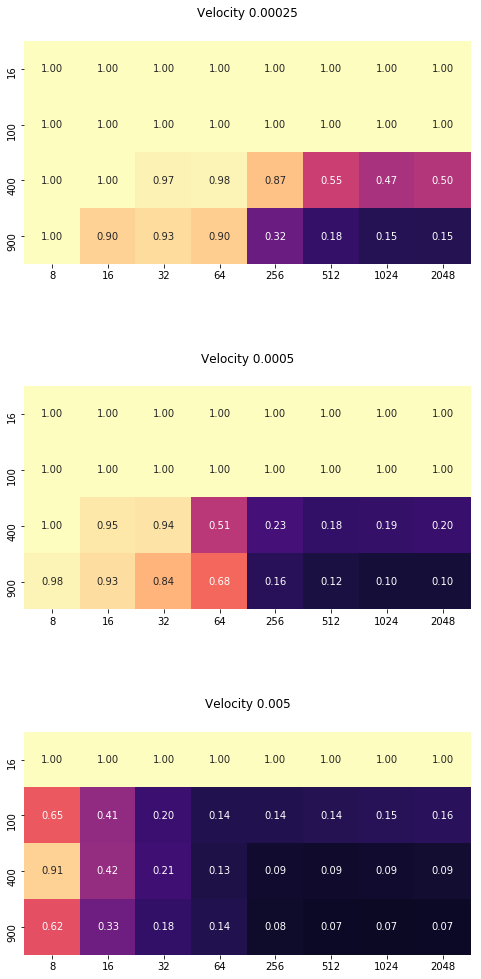

In [203]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
plot_heatmap(vel_restriction=0.00025, ax=axes[0], title='Velocity 0.00025', cbar=False)
plot_heatmap(vel_restriction=0.0005, ax=axes[1], title='Velocity 0.0005', cbar=False)
plot_heatmap(vel_restriction=0.005, ax=axes[2], title='Velocity 0.005', cbar=False)

plt.savefig('./accuracy.png', dpi=300)

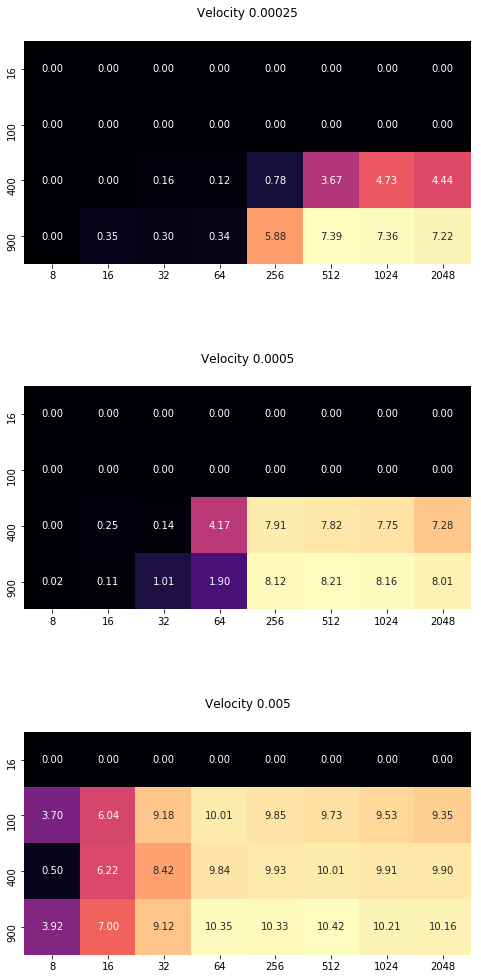

In [204]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
plot_heatmap(vel_restriction=0.00025, ax=axes[0], metric='error', vmin=None, vmax=None, title='Velocity 0.00025', cbar=False)
plot_heatmap(vel_restriction=0.0005, ax=axes[1], metric='error', vmin=None, vmax=None, title='Velocity 0.0005', cbar=False)
plot_heatmap(vel_restriction=0.005, ax=axes[2], metric='error', vmin=None, vmax=None, title='Velocity 0.005', cbar=False)

plt.savefig('./error.png', dpi=300)

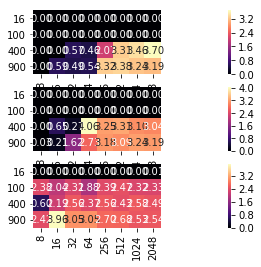

In [205]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(24, 4))
plot_heatmap(vel_restriction=0.00025, ax=axes[0], metric='error_std', vmin=None, vmax=None)
plot_heatmap(vel_restriction=0.0005, ax=axes[1], metric='error_std', vmin=None, vmax=None)
plot_heatmap(vel_restriction=0.005, ax=axes[2], metric='error_std', vmin=None, vmax=None)

plt.savefig('./error_std.png', dpi=300)

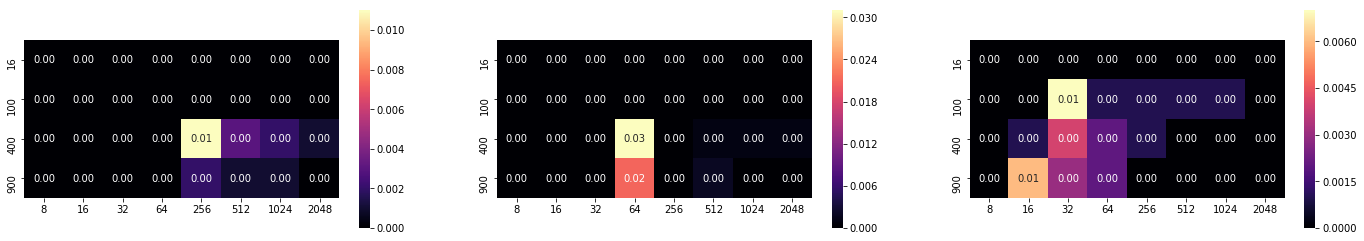

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4))
plot_heatmap(vel_restriction=0.00025, ax=axes[0], metric='accuracy_std', vmin=None, vmax=None)
plot_heatmap(vel_restriction=0.0005, ax=axes[1], metric='accuracy_std', vmin=None, vmax=None)
plot_heatmap(vel_restriction=0.005, ax=axes[2], metric='accuracy_std', vmin=None, vmax=None)

plt.savefig('./accuracy_std.png', dpi=300)

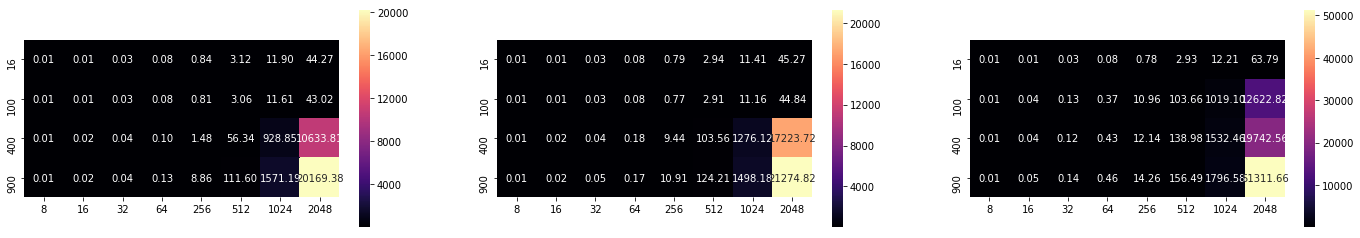

In [207]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 4))
plot_heatmap(vel_restriction=0.00025, ax=axes[0], metric='recovery_time', vmin=None, vmax=None)
plot_heatmap(vel_restriction=0.0005, ax=axes[1], metric='recovery_time', vmin=None, vmax=None)
plot_heatmap(vel_restriction=0.005, ax=axes[2], metric='recovery_time', vmin=None, vmax=None)

plt.savefig('./recovery_time.png', dpi=300)

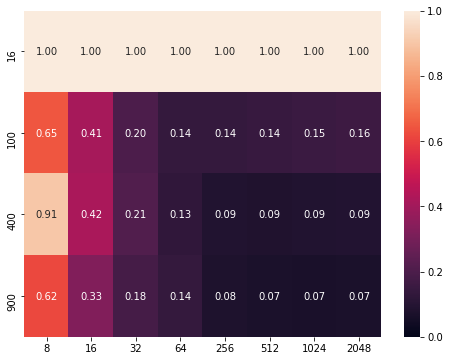

In [119]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_heatmap(vel_restriction=0.005, ax=ax)

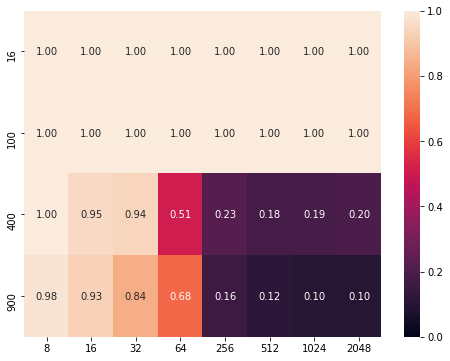

In [120]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_heatmap(vel_restriction=0.0005, ax=ax)

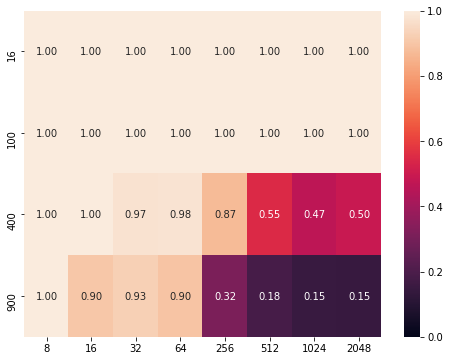

In [121]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_heatmap(vel_restriction=0.00025, ax=ax)

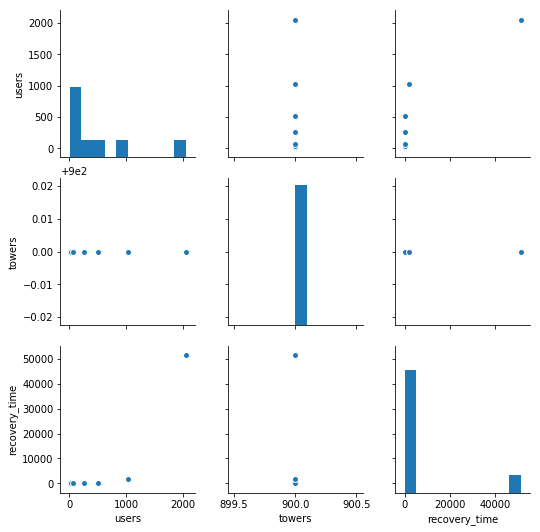

In [208]:
f = df[(df.velocity == 0.005) & (df.towers == 900)]

sns.pairplot(f[['users', 'towers', 'recovery_time']])

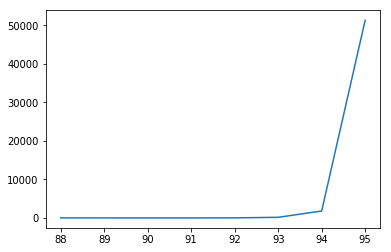

In [210]:
f.recovery_time.plot()